# Customer Segmentation using Clustering

In this task, we perform customer segmentation using clustering techniques. We use both profile information (from `Customers.csv`) and transaction data (from `Transactions.csv`). The task includes:
- Aggregating the necessary features from the data.
- Applying a clustering algorithm to segment customers.
- Evaluating the clustering using metrics like the Davies-Bouldin Index.
- Visualizing the clusters.



### 1. Import Necessary Libraries

In [37]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load Data

In [38]:
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

### 3. Merge Customer and Transaction Data

In [39]:
df = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')

### 4. Feature Engineering

In [40]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['SignupDate'] = pd.to_datetime(df['SignupDate'])
df['TotalSpending'] = df.groupby('CustomerID')['TotalValue'].transform('sum')
df['Frequency'] = df.groupby('CustomerID')['TransactionID'].transform('count')
df['LastTransactionDate'] = df.groupby('CustomerID')['TransactionDate'].transform('max')
df['Recency'] = (df['LastTransactionDate'].max() - df['LastTransactionDate']).dt.days
df['SignupYear'] = df['SignupDate'].dt.year


### 5. Aggregate Customer Data



In [41]:
df_customer_agg = df[['CustomerID', 'TotalSpending', 'Frequency', 'Recency', 'SignupYear']].drop_duplicates()

### 6. Feature Scaling

In [42]:
features = df_customer_agg[['TotalSpending', 'Frequency', 'Recency', 'SignupYear']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

### 7. Apply KMeans Clustering



In [43]:
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust n_clusters as needed
df_customer_agg['Cluster'] = kmeans.fit_predict(features_scaled)


### 8. Visualize Clusters

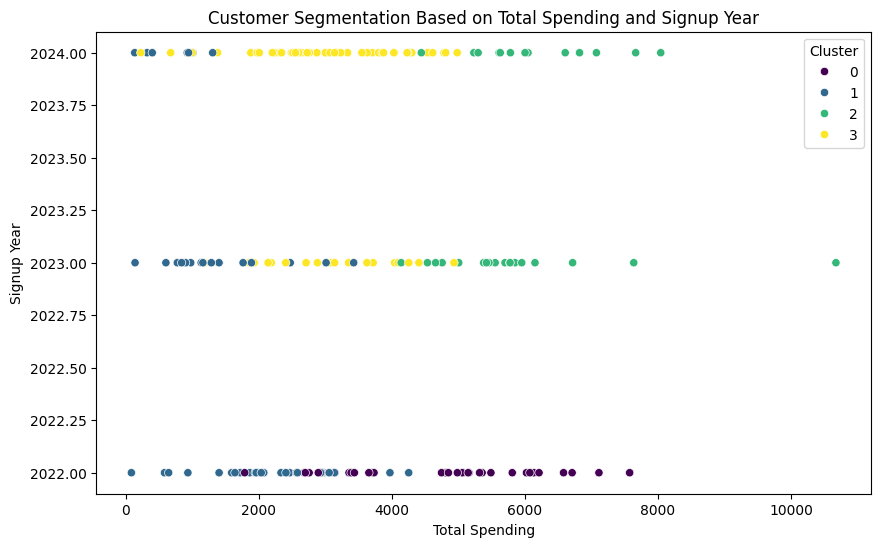

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_customer_agg['TotalSpending'], y=df_customer_agg['SignupYear'], hue=df_customer_agg['Cluster'], palette='viridis')
plt.title('Customer Segmentation Based on Total Spending and Signup Year')
plt.xlabel('Total Spending')
plt.ylabel('Signup Year')
plt.legend(title='Cluster')
plt.show()

### 9. Cluster Summary

In [45]:
cluster_summary = df_customer_agg.groupby('Cluster').agg(
    TotalSpending_mean=('TotalSpending', 'mean'),
    TotalSpending_std=('TotalSpending', 'std'),
    Frequency_mean=('Frequency', 'mean'),
    Recency_mean=('Recency', 'mean'),
    SignupYear_mean=('SignupYear', 'mean')
).reset_index()

In [46]:
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
   Cluster  TotalSpending_mean  TotalSpending_std  Frequency_mean  \
0        0         4596.933333        1461.741967        6.611111   
1        1         1742.439200        1015.808821        2.800000   
2        2         5875.086061        1310.114313        7.545455   
3        3         3043.827000        1033.590141        4.662500   

   Recency_mean  SignupYear_mean  
0     47.250000      2022.000000  
1    141.300000      2022.580000  
2     45.969697      2023.454545  
3     55.262500      2023.712500  


### 10. Calculate Davies-Bouldin Index

In [47]:
db_index = davies_bouldin_score(features_scaled, kmeans.labels_)
print(f"\nDavies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 1.2528051711926245
